# 

# 분류의 성능 평가지표

In [14]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# seaborn lib add
import seaborn as sns

from glob import glob

%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris, load_breast_cancer

from IPython.display import Image

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold, cross_val_score , cross_validate,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder,StandardScaler, MinMaxScaler
import graphviz

import missingno as msno

sklearn.__version__

numpy version: 1.20.1
pandas version: 1.2.4


'0.24.1'

### 정확도 : 실제 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표
- 문제점 : 이진분류의 경우 모델의 성능을 왜곡할 수 있다. & data가 inbalance한 경우에도 성능 왜곡할 수 있음.
    - 왜?
        - 해결책 : F1 score(Precision, Recall)
        

### 분류모델 성능 평가를 위한 이해
#### TP : target = 1 , predict=1 인 경우, 실제로도 1이고 예측도 1로 한 경우
#### TN : target = 0 , predict=0 인 경우, 실제로도 0이고 예측도 0으로 한 경우
#### FN : target = 1 , predict=0 인 경우, 실제로 1인데 예측을 0로 한 경우 → type 1 error
#### FP : target = 0 , predict=1 인 경우, 실제로 0인데 예측을 1로 한 경우 → type 2 error


In [10]:
target     = [1,0,0,1,1,1,0,1,1,1]
prediction = [0,1,1,1,1,0,1,0,1,0]

tp = tn = fn = fp = 0
for idx in range(len(target)):
    if target[idx]== 1 and prediction[idx]== 1:
        tp += 1
    if target[idx]== 0 and prediction[idx]== 0:
        tn += 1
    if target[idx]== 1 and prediction[idx]== 0:
        fn += 1
    if target[idx]== 0 and prediction[idx]== 1:
        fp += 1
        
print("tp : ",tp)
print("tn : ",tn)
print("fp : ",fp)
print("fn : ",fn)

tp :  3
tn :  0
fp :  3
fn :  4


In [13]:
print('accuracy : ',accuracy_score(target, prediction))
print('confusion_matrix : ',confusion_matrix(target, prediction))
print('precision : ',precision_score(target, prediction))
print('recall : ',recall_score(target, prediction))
print('f1 score : ',f1_score(target, prediction))

accuracy :  0.3
confusion_matrix :  [[0 3]
 [4 3]]
precision :  0.5
recall :  0.42857142857142855
f1 score :  0.4615384615384615


### f1 score가 accuracy보다 더 높고, recall과 precision의 차이가 크지 않으므로 f1 score 를 평가지표로 활용하는게 더 좋다.

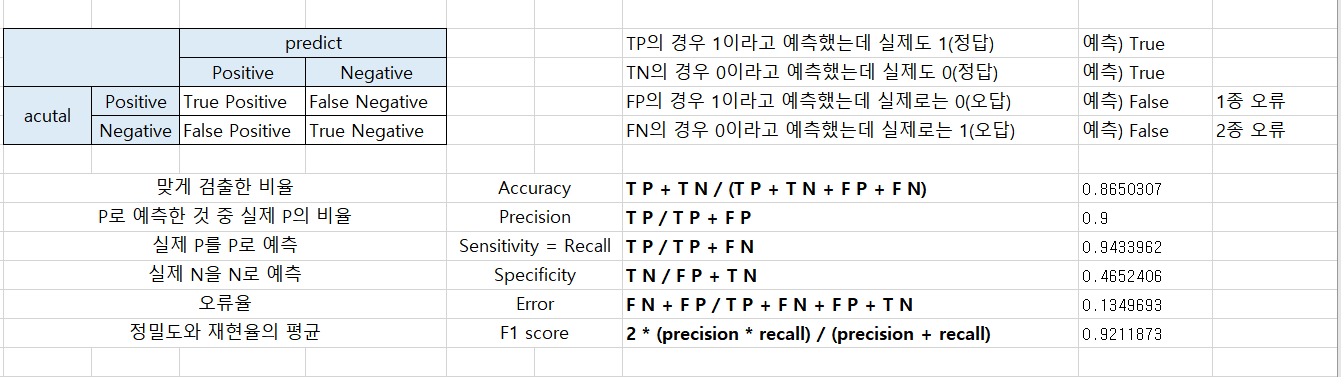

In [17]:
Image('C:/img/confusion_matrix_분석방법.png')

## 이진분류표
### 제품을 생산하는 제조공장에서 품질테스트를 실시하여 불량품을 찾아내고 불량품을 공장으로 돌려보낸다.
### 
### 품질 테스트의 결과가 양성 → 불량품을 예측 1
###                      음성 → 정상제품으로 예측 0
#### TP : 불량으로 예측하고 실제 불량인 것
#### TN : 정상으로 예측하고 실제 정상인 것
#### FP : 불량으로 예측했는데 실제 정상인 것
#### FN : 정상으로 예측했는데 실제 불량인 것
####  구분       | 불량 예측  |       정상예측
#### 불량품       |   TP           |        FN
#### 정상제품    |   FP           |          TN